In [1]:
import pandas  as pd 
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
df =pd.DataFrame(iris.data,columns = iris.feature_names)

In [4]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [5]:
df["target"] = iris.target

In [6]:
df["flower"] = df["target"].apply(lambda x : iris.target[x])

In [7]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0


In [8]:
df0 = df[0:50]
df1 = df[51:100]
df2 = df[101:150]

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

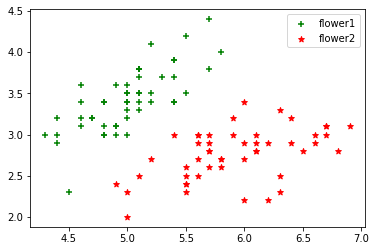

In [16]:
plt.scatter(df0["sepal length (cm)"],df0["sepal width (cm)"],color = "green",marker = "+",label = "flower1")
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],color = "red",marker = "*",label = "flower2")
plt.legend()

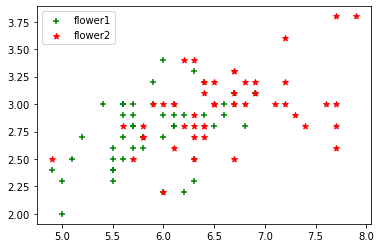

In [17]:
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],color = "green",marker = "+",label = "flower1")
plt.scatter(df2["sepal length (cm)"],df2["sepal width (cm)"],color = "red",marker = "*",label = "flower2")
plt.legend()

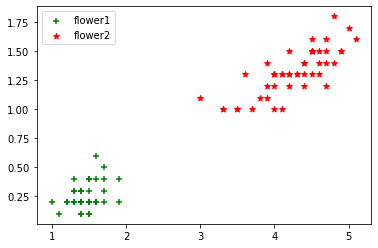

In [19]:
plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"],color = "green",marker = "+",label = "flower1")
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color = "red",marker = "*",label = "flower2")
plt.legend()

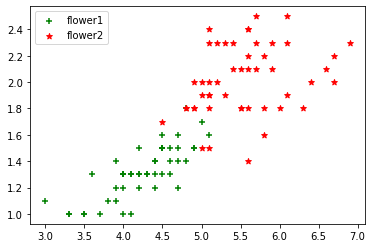

In [20]:
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color = "green",marker = "+",label = "flower1")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],color = "red",marker = "*",label = "flower2")
plt.legend()

In [24]:
x = df.drop(["target","flower"],axis = 1)

In [25]:
y = df["target"]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = .7)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
model = KNeighborsClassifier(n_neighbors =10)

In [36]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [38]:
model.score(x_test,y_test)

0.9777777777777777

In [59]:
model.score(x_train,y_train)    # just to check model for train

0.9904761904761905

In [44]:
from sklearn.metrics import confusion_matrix


In [45]:
y_predict = model.predict(x_test)

In [52]:
len(y_test)

45

In [53]:
14 +14 +17

45

In [48]:
cm = confusion_matrix(y_test,y_predict) # x axiss is truth and y is predict
cm

array([[17,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 14]], dtype=int64)

Text(33.0, 0.5, 'predict')

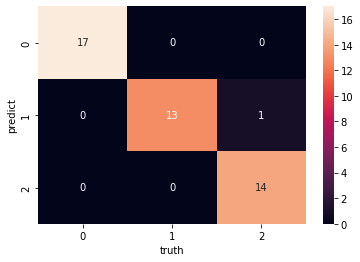

In [51]:
sns.heatmap(cm,annot = True)
plt.xlabel("truth")
plt.ylabel("predict")

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [56]:
df["classification"] = model.predict(iris.data)

In [58]:
cm =confusion_matrix(df["target"],df["classification"])
cm

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]], dtype=int64)

In [ ]:
exercise

Classify digits (0 to 9) using KNN classifier. You can use different values for k neighbors and need to figure out a value of K that gives you a maximum score. You can manually try different values of K or use gridsearchcv
Plot confusion matrix
Plot classification report
Solution link

In [60]:
digits = datasets.load_digits()

In [61]:
df= pd.DataFrame(digits.data,columns = digits.feature_names)

In [62]:
df["target"] = digits.target

In [64]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [65]:
x =df.drop(["target"],axis = 1)

In [68]:
len(x)

1797

In [70]:
y = df["target"]

In [71]:
len(y)

1797

In [72]:
from sklearn.model_selection import train_test_split

In [76]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,train_size  = .5)

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
model = KNeighborsClassifier(n_neighbors = 10)

In [79]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [80]:
model.score(x_test,y_test)

0.9666295884315906

In [81]:
from sklearn.metrics import confusion_matrix

In [82]:
y_predict = model.predict(x_test)

In [88]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[ 87,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 101,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0,   0,  95,   0,   0,   0,   0,   0,   3,   0],
       [  0,   0,   1,  76,   0,   1,   0,   0,   2,   0],
       [  0,   0,   0,   0,  86,   0,   0,   1,   0,   0],
       [  0,   0,   0,   0,   1,  87,   1,   0,   0,   3],
       [  0,   1,   0,   0,   0,   0,  83,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  77,   0,   0],
       [  0,   6,   0,   1,   0,   0,   0,   1,  84,   0],
       [  1,   1,   0,   1,   0,   2,   0,   2,   0,  93]], dtype=int64)

<AxesSubplot:>

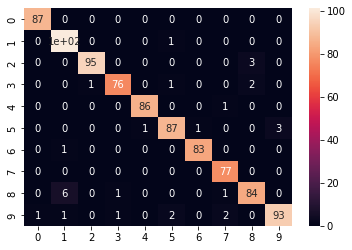

In [85]:
sns.heatmap(cm,annot = True)

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        87
           1       0.93      0.99      0.96       102
           2       0.99      0.97      0.98        98
           3       0.97      0.95      0.96        80
           4       0.99      0.99      0.99        87
           5       0.96      0.95      0.95        92
           6       0.99      0.99      0.99        84
           7       0.95      1.00      0.97        77
           8       0.94      0.91      0.93        92
           9       0.97      0.93      0.95       100

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



In [89]:
from sklearn.model_selection import GridSearchCV

In [104]:
model= GridSearchCV(KNeighborsClassifier(),{"n_neighbors":[1,2,3,4,5,6,7,8,9,10]},cv = 5,return_train_score = False)

In [105]:
model.fit(digits.data,digits.target)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [106]:
model.cv_results_

{'mean_fit_time': array([0.00129118, 0.        , 0.00231633, 0.        , 0.        ,
        0.00051117, 0.0004035 , 0.        , 0.        , 0.        ]),
 'std_fit_time': array([0.00258236, 0.        , 0.00293897, 0.        , 0.        ,
        0.00102234, 0.000807  , 0.        , 0.        , 0.        ]),
 'mean_score_time': array([0.02079029, 0.01599102, 0.01379786, 0.02386842, 0.02000365,
        0.0184803 , 0.01762853, 0.02397299, 0.02113228, 0.01995668]),
 'std_score_time': array([0.00589331, 0.00490064, 0.00180655, 0.00473153, 0.00033498,
        0.00187834, 0.00385005, 0.00483196, 0.00362202, 0.0035711 ]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 6},


In [107]:
pd.DataFrame(model.cv_results_)[["params","mean_test_score"]]

,params,mean_test_score
0,{'n_neighbors': 1},0.964393
1,{'n_neighbors': 2},0.967171
2,{'n_neighbors': 3},0.966622
3,{'n_neighbors': 4},0.963841
4,{'n_neighbors': 5},0.962728
5,{'n_neighbors': 6},0.959386
6,{'n_neighbors': 7},0.959946
7,{'n_neighbors': 8},0.958276
8,{'n_neighbors': 9},0.956611
9,{'n_neighbors': 10},0.954943


In [108]:
model.best_score_

0.9671711544413494

In [109]:
model.best_params_

{'n_neighbors': 2}

In [ ]:
from above we can conclude that parameter n_nighbors = 2 is best for model 

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
model = KNeighborsClassifier(n_neighbors = 2)

In [113]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [115]:
model.score(x_test,y_test)

0.9766407119021134